## **Leader Board SOTA Approaches**

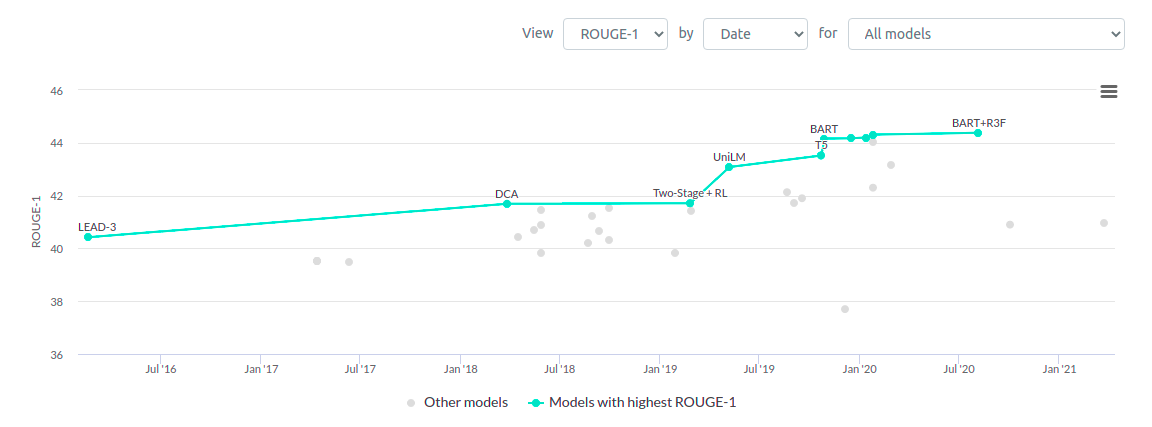

Source - https://paperswithcode.com/sota/abstractive-text-summarization-on-cnn-daily

# **BART: CRUX**


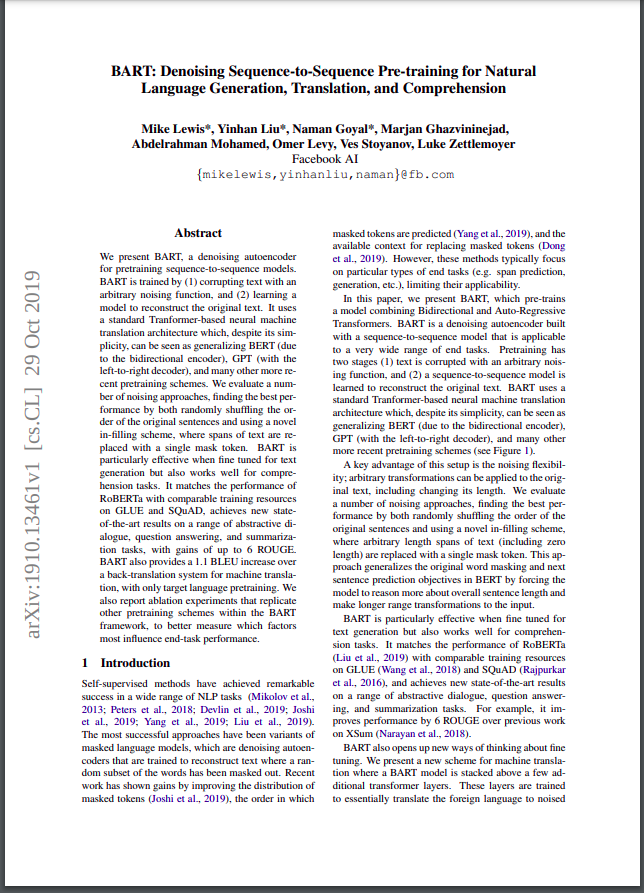

**Approach Used**

Bidirectional and Auto-Regressive Transformers

A denoising autoencoder for pretraining sequence-to-sequence models. BART is trained by:

1. Corrupting text with an arbitrary noising function
2. Learning a model to reconstruct the original text.


Few of the tasks it can solve:

1. Abstractive Dialogue
2. Question Answering
3. Summarization Tasks

# **BART Basics: Encoder**

BART Architecture consists of a standard seq2seq/ NMT architecture 


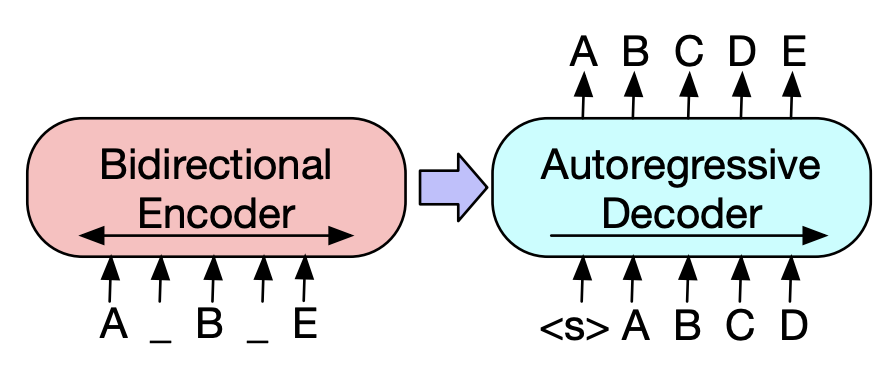

**Why BART: Model Comparison**

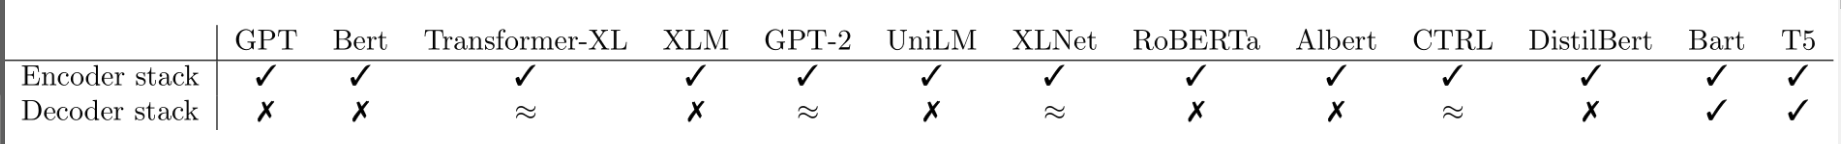

BART combines the power with both an encoder and a decoder layer giving SOTA results in comparison to other models

# **BART Basics: Encoder - Decoder Architecture**


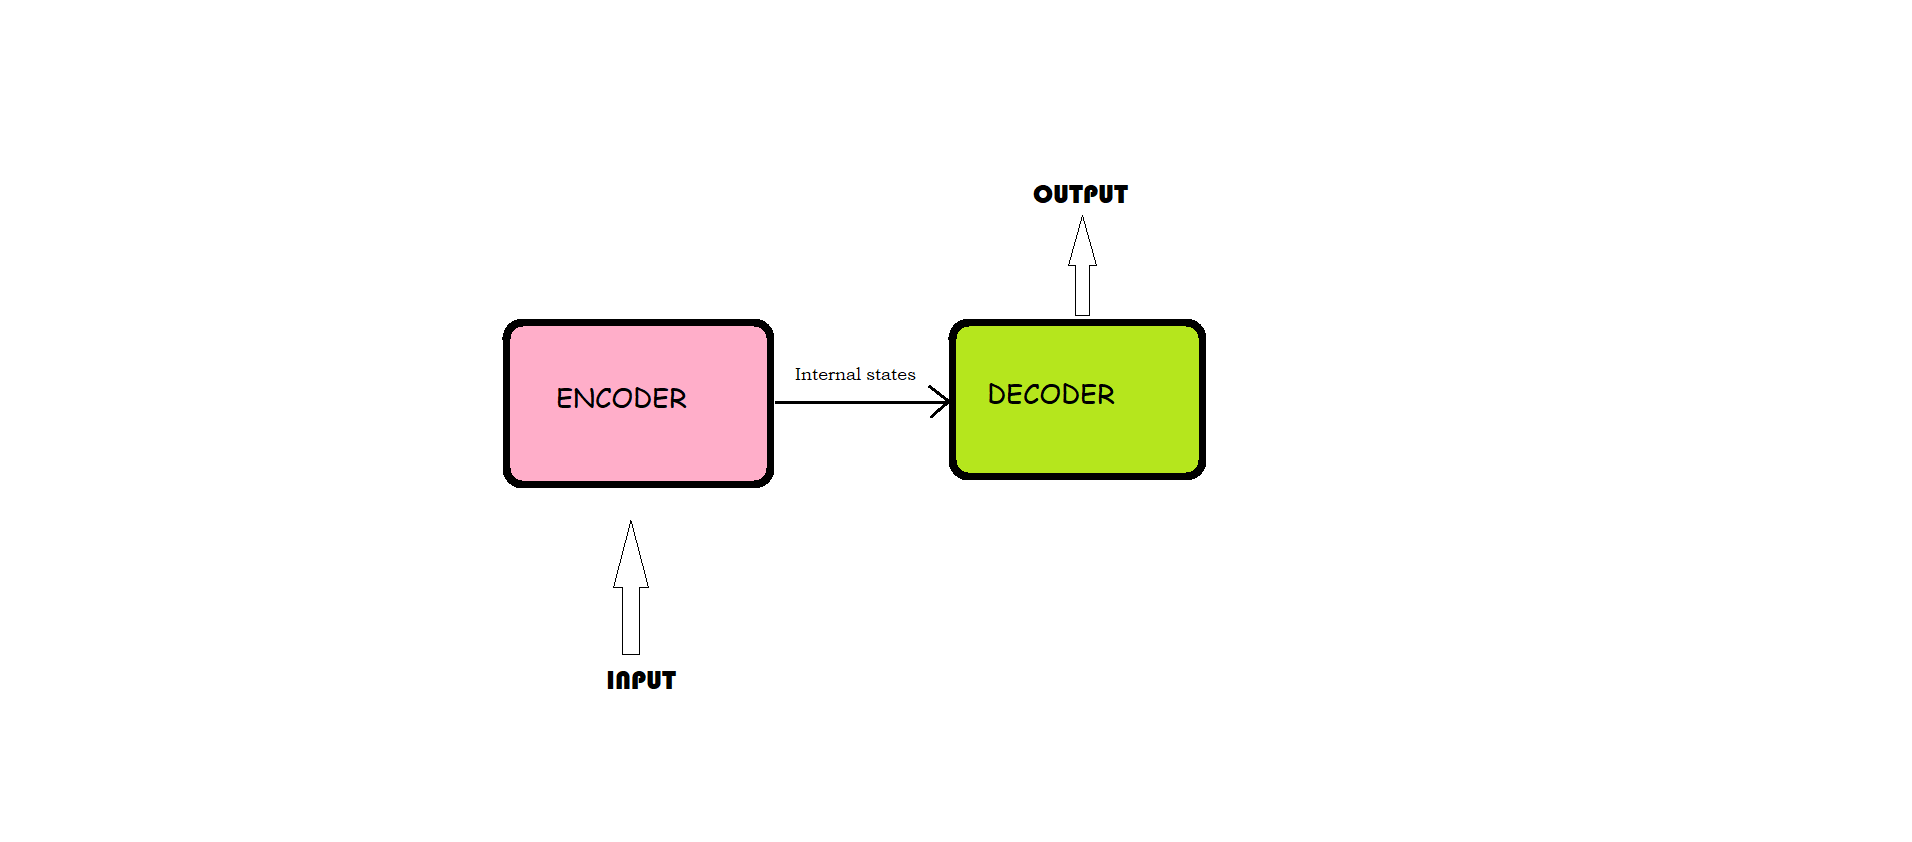

***Encoder*** -It accepts a single element of the input sequence at each time step, process it, collects information for that element and propagates it forward.

***Intermediate vector***- This is the final internal state produced from the encoder part of the model. It contains information about the entire input sequence to help the decoder make accurate predictions.

***Decoder***- given the entire sentence, it predicts an output at each time step.

# **BART Summarization Pre-Training Data Description: CNN/ DM**




The CNN/DailyMail (Hermann et al., 2015) dataset contains 93k articles from the CNN, and 220k articles the Daily Mail newspapers. Both publishers supplement their articles with bullet point summaries. Non-anonymized variant in See et al. (2017).


Download and unzip the stories directories from here for both CNN and Daily Mail. The files can be downloaded from the terminal with gdown, which can be installed with pip install gdown.

In [ ]:
!pip install datasets

from datasets import load_dataset, list_datasets

datasets = list_datasets()

Permalink: https://huggingface.co/datasets/viewer/?dataset=cnn_dailymail&config=3.0.0



In [ ]:
from pprint import pprint

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)

🤩 Currently 964 datasets are available on the hub:
['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc',
 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity',
 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'amttl', 'anli',
 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews',
 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect',
 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset',
 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic',
 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli',
 'bc2gm_corpus', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum',
 'bing_coronavirus_query_set', 'biomrc', 'blended_skill_talk', 'blimp',
 'blog_authorship_corpus', 'bn_hate_speech', 'bookcorpus', 'bookcorpusopen',
 'boolq', 'bprec', 'break_data', 'brwac', 'bsd_ja_en', 'bswac', 'c3', 'c4',
 'cail2018'

In [ ]:
dataset_ = load_dataset('cnn_dailymail', '3.0.0', split='train[:15]')

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234. Subsequent calls will reuse this data.


In [ ]:
print(dataset_)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 15
})


In [ ]:
print(f"👉Dataset len(dataset): {len(dataset_)}")
print("\n👉First item 'dataset[0]':")
pprint(dataset_[0])

👉Dataset len(dataset): 15

👉First item 'dataset[0]':
{'article': "It's official: U.S. President Barack Obama wants lawmakers to "
            'weigh in on whether to use military force in Syria. Obama sent a '
            'letter to the heads of the House and Senate on Saturday night, '
            'hours after announcing that he believes military action against '
            'Syrian targets is the right step to take over the alleged use of '
            'chemical weapons. The proposed legislation from Obama asks '
            'Congress to approve the use of military force "to deter, disrupt, '
            'prevent and degrade the potential for future uses of chemical '
            'weapons or other weapons of mass destruction." It\'s a step that '
            'is set to turn an international crisis into a fierce domestic '
            'political battle. There are key questions looming over the '
            'debate: What did U.N. weapons inspectors find in Syria? What '
            'h

# **BART Fine Tuning: Methodologies**



In [ ]:
!pip install transformers
!pip install pytorch_lightning

     |████████████████████████████████| 2.5MB 25.7MB/s 
     |████████████████████████████████| 901kB 34.2MB/s 
     |████████████████████████████████| 3.3MB 38.1MB/s 
     |████████████████████████████████| 819kB 30.2MB/s 
     |████████████████████████████████| 645kB 40.9MB/s 
     |████████████████████████████████| 10.6MB 43.5MB/s 
     |████████████████████████████████| 122kB 47.1MB/s 
     |████████████████████████████████| 235kB 46.2MB/s 
     |████████████████████████████████| 829kB 37.3MB/s 
     |████████████████████████████████| 1.3MB 40.4MB/s 
     |████████████████████████████████| 143kB 48.8MB/s 
     |████████████████████████████████| 296kB 44.7MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=53bec7ed790320b77b3c28557886ec5d0d278fba1d59aeda092410866543c5c7
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement t

In [ ]:
import torch
from torch.nn import functional as F
from torch import nn
import pytorch_lightning as pl
# https://www.pytorchlightning.ai/

from transformers import BartForConditionalGeneration, BartTokenizer
from sklearn.model_selection import train_test_split
import pandas as pd

from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)
from torch.utils.data import DataLoader

In [ ]:
# Checking out the GPU we have access to. This is output is from the google colab version. 
!nvidia-smi

Wed Jul 14 18:32:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
class Dataset(torch.utils.data.Dataset):
    """Class Used a dataset loader with defined overidden methods as required by
    `pytorch` dataloader.
    
    For more information about Dataset, Dataloader read:

    https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
    """

    def __init__(self, texts, summaries, tokenizer, source_len, summ_len):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.source_len  = source_len
        self.summ_len = summ_len

    def __len__(self):
        return len(self.summaries) - 1

    def __getitem__(self, index):
        text = ' '.join(str(self.texts[index]).split())

        summary = ' '.join(str(self.summaries[index]).split())

        # Article text pre-processing
        source = self.tokenizer.batch_encode_plus([text],
                                                  max_length= self.source_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')
        # Summary Target pre-processing
        target = self.tokenizer.batch_encode_plus([summary],
                                                  max_length= self.summ_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')

        return (
            source['input_ids'].squeeze(), 
            source['attention_mask'].squeeze(), 
            target['input_ids'].squeeze(),
            target['attention_mask'].squeeze()
        )

class BARTDataLoader(pl.LightningDataModule):
    '''Pytorch Ligtning Model Dataloader class for BART'''

    def __init__(self, tokenizer, text_len, summarized_len, file_path,
                 corpus_size, columns_name, train_split_size, batch_size):
        super().__init__()
        self.tokenizer = tokenizer
        self.text_len = text_len
        self.summarized_len = summarized_len
        self.input_text_length = summarized_len
        self.file_path = file_path
        self.nrows = corpus_size
        self.columns = columns_name
        self.train_split_size = train_split_size
        self.batch_size = batch_size

    def prepare_data(self):
        data = pd.read_csv(self.file_path, nrows=self.nrows,
                               encoding='latin-1')
        data = data[self.columns]
        data.iloc[:, 1] = 'summarize: ' + data.iloc[:, 1]
        self.text =  list(data.iloc[:, 0].values)
        self.summary =  list(data.iloc[:, 1].values)

    def setup(self):
        X_train , y_train, X_val, y_val = train_test_split(
            self.text, self.summary
        )

        self.train_dataset = (X_train, y_train) 
        self.val_dataset = (X_val, y_val)

    def train_dataloader(self):
        train_data = Dataset(texts=self.train_dataset[0],
                             summaries=self.train_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(train_data, self.batch_size)

    def val_dataloader(self):
        val_dataset = Dataset(texts=self.val_dataset[0],
                             summaries=self.val_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(val_dataset, self.batch_size)

In [ ]:
class AbstractiveSummarizationBARTFineTuning(pl.core.lightning.LightningModule):
    """Abstractive summarization model class"""

    def __init__(self, model, tokenizer):
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer

    def forward(self, input_ids, attention_mask, decoder_input_ids,
                decoder_attention_mask=None, lm_labels=None):
        """Model forward pass"""
        outputs = self.model.forward(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            labels=decoder_input_ids
        )

        return outputs


    def preprocess_batch(self, batch):
        """Reformatting batch"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask = batch

        y = decoder_input_ids
        decoder_ids = decoder_input_ids
        source_ids = input_ids
        source_mask = source_attention_mask

        return source_ids, source_mask, decoder_ids, decoder_attention_mask, decoder_attention_mask

    def training_step(self, batch, batch_idx):
        """Model Training Step computes """

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels 
                       )
        loss = outputs.loss

        return loss

    def validation_step(self, batch, batch_idx):
        """"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels 
                       )
        loss = outputs.loss

        return loss

    def training_epoch_end(self, outputs):
        avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
        self.log('Epoch', self.trainer.current_epoch)
        self.log('avg_epoch_loss', {'train': avg_loss})

    def val_epoch_end(self, loss):
        avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
        self.log('avg_epoch_loss', {'Val': avg_loss})

    def configure_optimizers(self):

        model = self.model
        optimizer = AdamW(model.parameters())
        self.opt = optimizer

        return [optimizer]

In [ ]:
# Tokenizer
model_ = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Dataloader
dataloader = BARTDataLoader(tokenizer=tokenizer, text_len=512,
                            summarized_len=150,
                            file_path='/content/curated_data_subset.csv',
                            corpus_size=50, columns_name=['article_content','summary'],
                            train_split_size=0.8, batch_size=2)
# Read and pre-process data
dataloader.prepare_data()

# Train-test Split
dataloader.setup()

In [ ]:
# Main Model class
model = AbstractiveSummarizationBARTFineTuning(model=model_, tokenizer=tokenizer)

In [ ]:
# Trainer Class
trainer = pl.Trainer(check_val_every_n_epoch=1, max_epochs=5)

# Fit model
trainer.fit(model, dataloader)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:597: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer"

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# **BART Abstractive Summarization: Using Pre Trained Model**

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')

# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=5, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


['My friends']


# References:

* https://huggingface.co/transformers/model_doc/bart.html
* https://www.pytorchlightning.ai/
* https://www.frase.io/blog/20-applications-of-automatic-summarization-in-the-enterprise/
* https://medium.com/sciforce/towards-automatic-summarization-part-2-abstractive-methods-c424386a65ea
* https://medium.com/swlh/a-simple-overview-of-rnn-lstm-and-attention-mechanism-9e844763d07b
* https://github.com/CurationCorp/curation-corpus